# Time Series Modeling and Forecasting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_ts = pd.read_csv('data/Biomass_History.csv', index_col=0)
df_ts.head()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
Index,,,,,,,,,,
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


<AxesSubplot:title={'center':'Biomass History'}, xlabel='Index'>

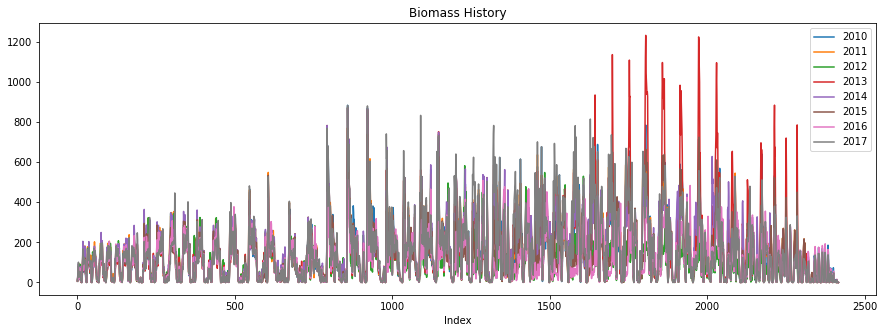

In [5]:
df_ts.iloc[:, 2:].plot(figsize=(15, 5), title='Biomass History')

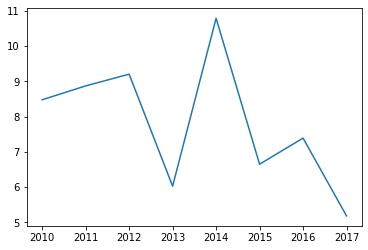

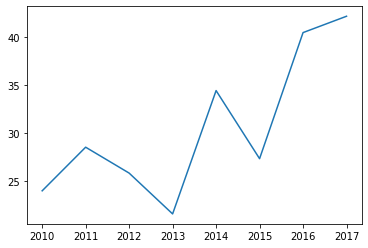

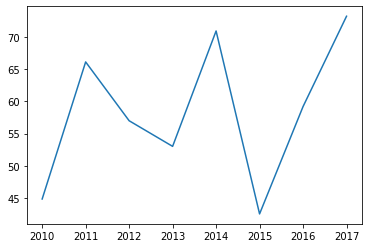

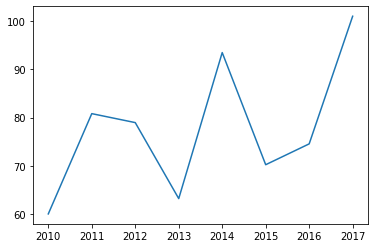

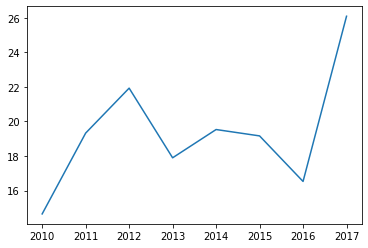

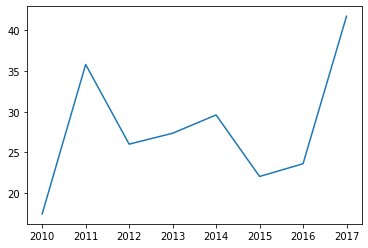

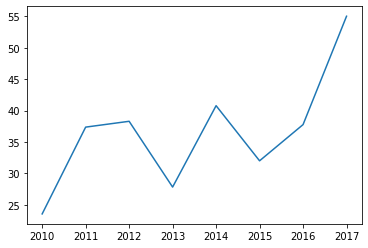

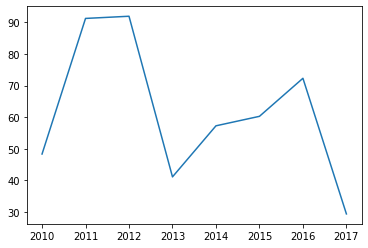

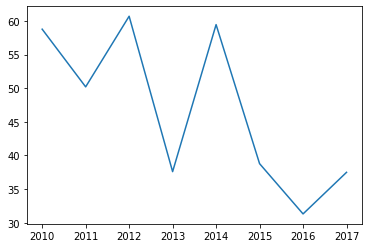

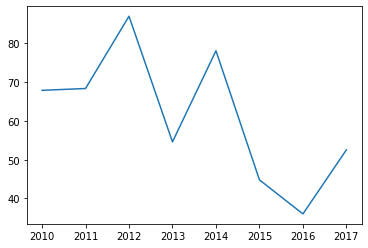

In [8]:
for i in range(10):
    df_ts.iloc[i, 2:].plot()
    plt.show()

<Axes: >

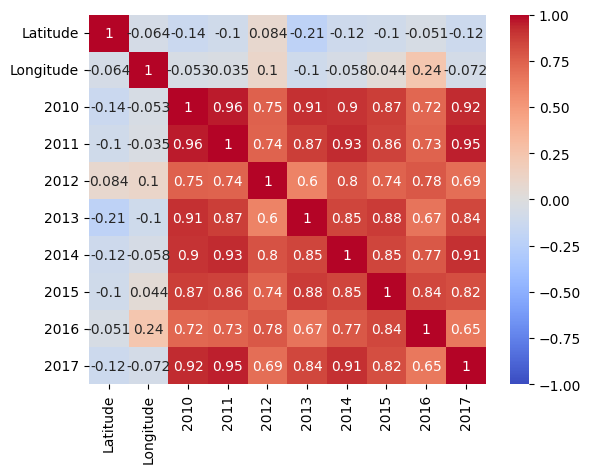

In [5]:
import seaborn as sns
df_corr = df_ts.iloc[:, :].corr()
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

<Axes: xlabel='Longitude', ylabel='Latitude'>

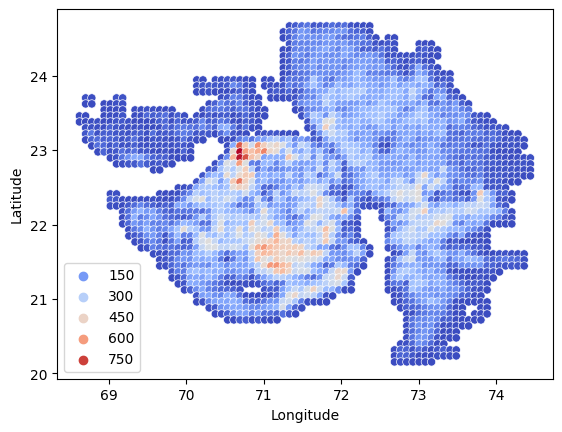

In [6]:
df_avg = df_ts.iloc[:, 2:].mean(axis=1)
sns.scatterplot(x='Longitude', y='Latitude', data=df_ts, hue=df_avg, palette='coolwarm')

<Axes: xlabel='Longitude', ylabel='Latitude'>

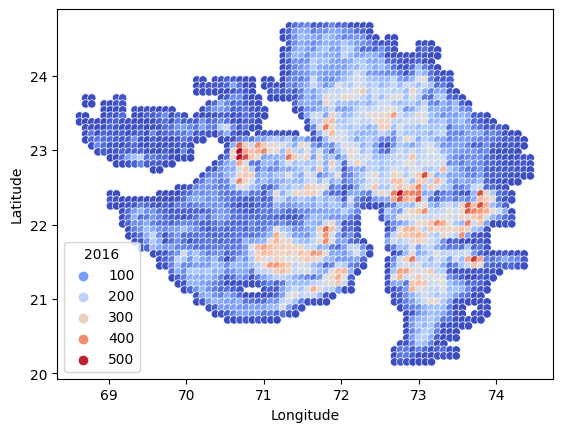

In [7]:
sns.scatterplot(x='Longitude', y='Latitude', data=df_ts, hue='2016', palette='coolwarm')

<Axes: xlabel='Longitude', ylabel='Latitude'>

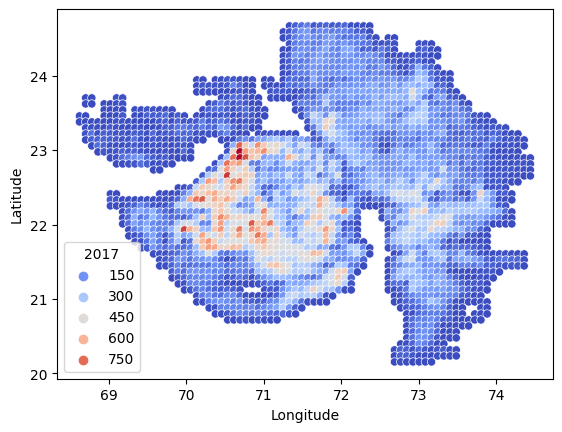

In [8]:
sns.scatterplot(x='Longitude', y='Latitude', data=df_ts, hue='2017', palette='coolwarm')

<Axes: xlabel='Longitude', ylabel='Latitude'>

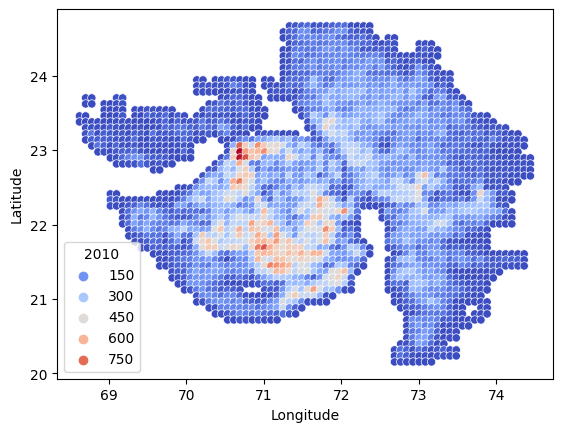

In [9]:
sns.scatterplot(x='Longitude', y='Latitude', data=df_ts, hue='2010', palette='coolwarm')

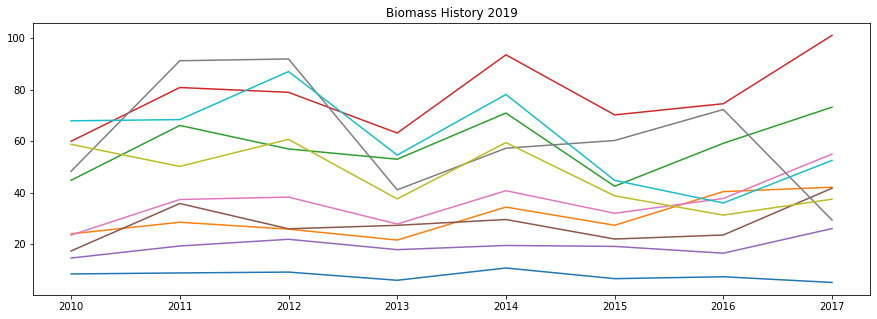

In [9]:
for i in range(10):
    df_ts.iloc[i, 2:].plot(figsize=(15, 5), title=f'Biomass History {2010+i}')

In [18]:
df1 = df_ts.copy()
df1['year_avg'] = df_ts.iloc[:, 2:].mean(axis=1)
df1 = df1[['Latitude', 'Longitude', 'year_avg']]
df1

,Latitude,Longitude,year_avg
Index,,,
0,24.66818,71.33144,7.821685
1,24.66818,71.41106,30.552764
2,24.66818,71.49069,58.343585
3,24.66818,71.57031,77.779249
4,24.66818,71.64994,19.390831
...,...,...,...
2413,20.15456,72.84432,4.856648
2414,20.15456,72.92394,0.121579
2415,20.15456,73.00357,0.039187


In [19]:
df1.describe()

,Latitude,Longitude,year_avg
count,2418.000000,2418.000000,2418.000000
mean,22.506537,71.826215,141.215293
std,1.034936,1.389804,127.699852
min,20.154560,68.624190,0.000622
25%,21.685970,70.774060,26.503632
50%,22.491970,71.888820,122.795112
75%,23.297970,73.003570,213.568856
max,24.668180,74.436820,804.882118


In [16]:
import numpy as np
gt_pos = np.zeros((10, 10))
gt_pos


# SACAR K-MEANS PARA LONGITUD LATITUD. GROUPBY LABEL BIOMASA Y MEDIA
# 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
from sklearn.neighbors import KDTree

kdt = KDTree(X, leaf_size=30, metric='euclidean')

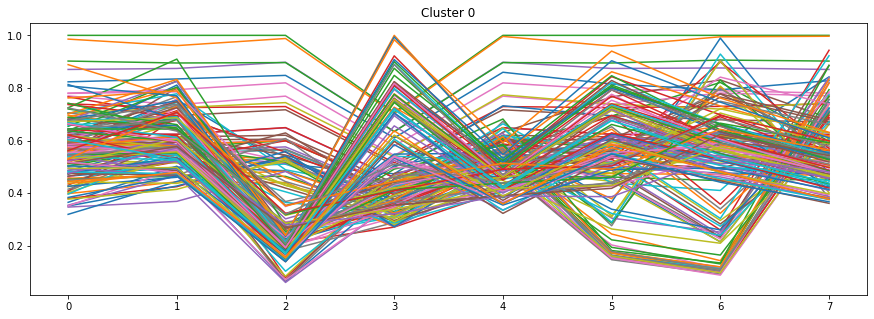

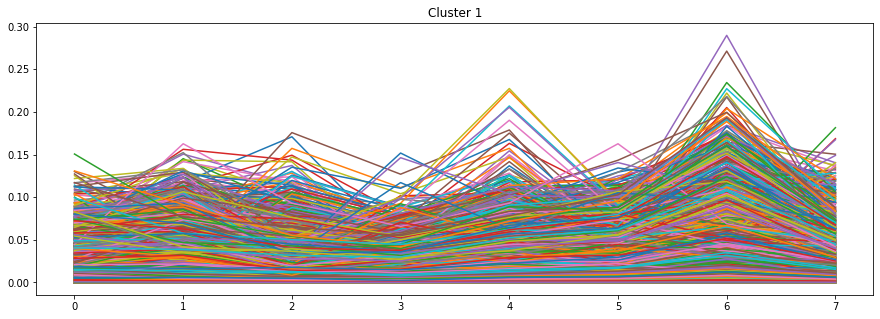

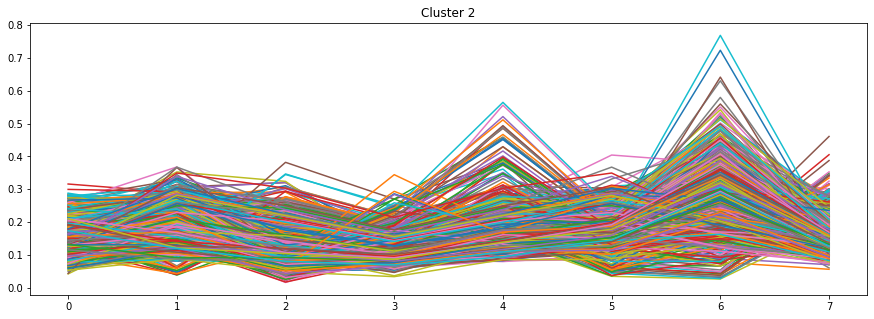

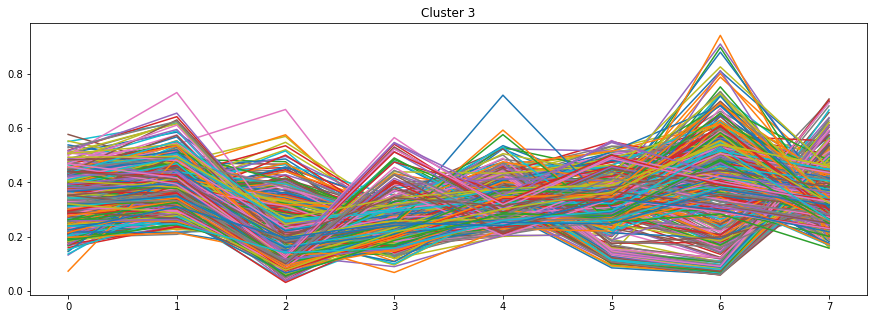

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

k = 4
km = KMeans(n_clusters=k, random_state=0)
scaler = MinMaxScaler()
X = df_ts.iloc[:, 2:]
X = pd.DataFrame(scaler.fit_transform(X))
km.fit(X)
X['cluster'] = km.labels_

for k in range(k):
    X[X['cluster'] == k].iloc[:, :-1].T.plot(figsize=(15, 5), title=f'Cluster {k}', legend=False)
    plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

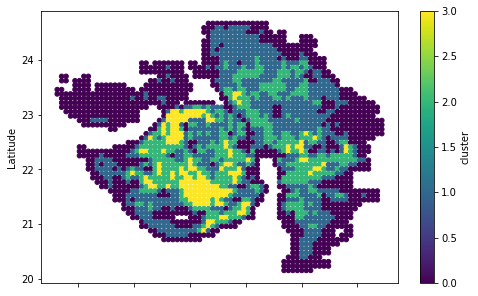

In [37]:
# LO QUE HA PASADO MIGUEL, ZONAS DE MAYOR PRODUCCIÓN COMPARARLO CON ESTOS CLUSTER
df_2 = df_ts.copy()
df_2['cluster'] = km.labels_
df_2['cluster'] = df_2['cluster'].map({0:3, 1:0, 2:1, 3:2})
df_2.plot.scatter(x='Longitude', y='Latitude', c='cluster', colormap='viridis', figsize=(8, 5))

In [35]:
df_2.groupby('cluster').mean()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
cluster,,,,,,,,,,
0,22.616953,72.042275,139.465810,153.526957,125.050954,152.602691,174.049000,140.282869,137.974434,153.690500
1,22.367132,71.940464,279.176647,295.921693,199.083951,297.331060,295.383340,250.840253,202.652786,318.879871
2,22.084988,71.322591,511.033230,478.464122,292.409614,630.053424,455.765363,419.214428,270.731098,520.553848
3,22.556611,71.687177,24.579721,26.581890,25.151069,28.708876,31.842512,24.640982,25.746507,28.661090


<Axes: xlabel='Year', ylabel='Biomass'>

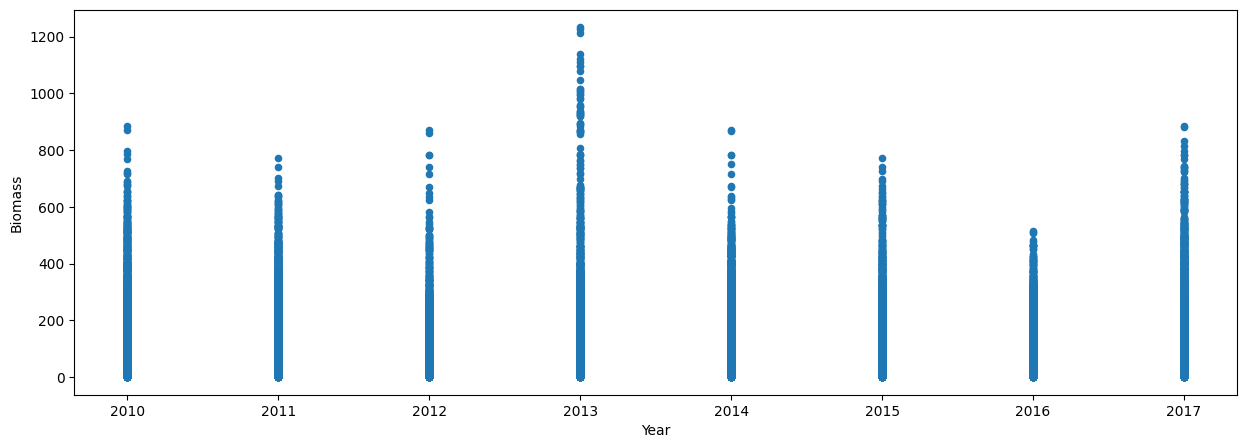

In [30]:
df_ts_time = df_ts.iloc[:, 2:]
df_ts_time = df_ts_time.melt(id_vars=None, value_vars=df_ts_time.columns, var_name='Year', value_name='Biomass')
df_ts_time.plot.scatter(x='Year', y='Biomass', figsize=(15, 5))